## OkCupid

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

OKCupid is an app that focuses on using multiple choice and short answers to match users.

In [1]:
import pandas as pd 

In the DataFrame `profiles`, we can see the information of people in OkCupid app.

In [54]:
profiles = pd.read_csv('profiles.csv')
print(profiles.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [3]:
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

In [152]:
print(profiles.describe())

                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


In [153]:
import matplotlib.pyplot as plt 
import seaborn as sns 

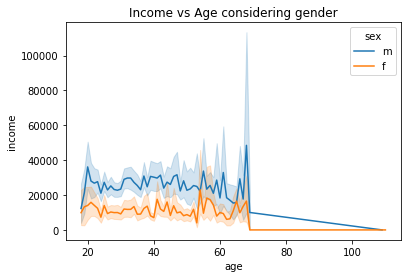

In [160]:
sns.lineplot(x='age', y='income', data=profiles, hue=profiles.sex)
plt.title('Income vs Age considering gender')
plt.show()

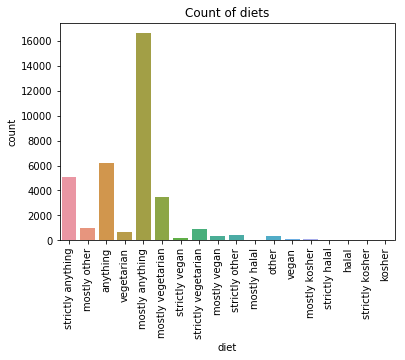

In [167]:
sns.countplot(x='diet', data=profiles)
plt.xticks(rotation=90)
plt.title('Count of diets')
plt.show()

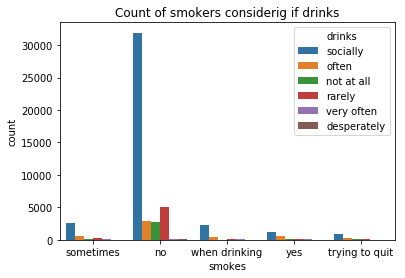

In [174]:
sns.countplot(x='smokes', data=profiles, hue='drinks')
plt.title('Count of smokers considerig if drinks')
plt.show()

Now, we're going to see if there is a correlation between Zodiac signs and wether people drinks, smokes or use drugs using the Logistic Regression model. 

In [137]:
#print(profiles.sign.unique())
profiles_aux = pd.DataFrame()

profiles_aux = profiles.dropna(subset=['drugs', 'drinks', 'smokes', 'sign', 'body_type']).reset_index()
profiles_aux['sign_'] = profiles_aux.sign.apply(lambda x: x.split()[0])
profiles_aux['drugs'] = profiles_aux.drugs.map({'never': 0, 'sometimes': 1, 'often': 2})
profiles_aux['drinks'] = profiles_aux.drinks.map({'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5 })
profiles_aux['smokes'] = profiles_aux.smokes.map({'no': 0, 'sometimes': 1, 'when drinking': 2, 'trying to quit': 3, 'yes': 4})

labels = profiles_aux['sign_'].map({'aries': 1 , 'taurus': 2 , 'gemini': 3, 'cancer': 4, 'leo': 5, 'virgo': 6, 'libra': 7, 'scorpio': 8, 'sagittarius': 9, 'capricorn': 10, 'aquarius': 11, 'pisces': 12}).to_numpy()

features = profiles_aux[['drugs', 'drinks', 'smokes']].to_numpy()

In [117]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

training_data, validation_data, training_labels, validation_labels = train_test_split(features, labels, train_size=0.8, test_size=0.2)
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(training_data, training_labels)
print(model.score(validation_data, validation_labels))

0.08646446355817111


With the previous model, we see there is no correlation between zodiac signs and if people drink, smoke or use drugs.

Next, we're going to see if there is a correlation between body type and the same previous features: drink, smoke, drugs. Once again, the model will be Logistic Regression. 

In [121]:
print(profiles_aux['body_type'].unique())

['a little extra' 'average' 'athletic' 'thin' 'fit' 'curvy' 'skinny'
 'full figured' 'rather not say' 'overweight' 'used up' 'jacked']


In [142]:
labels = profiles_aux.body_type.map({'skinny':0, 'thin':1, 'average':2, 'full figured':3, 'fit':4, 'athletic':5, 'jacked':6, 'a little extra':7, 'curvy':8, 'overweight':9, 'used up':10, 'rather not say': 11 }).to_numpy()
features = profiles_aux[['drugs', 'drinks', 'smokes']].to_numpy()

training_data, validation_data, training_labels, validation_labels = train_test_split(features, labels, train_size=0.8, test_size=0.2)
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=150)
model.fit(training_data, training_labels)
print(model.score(validation_data, validation_labels))

0.28746038931643275


There isn't a high correlation between body type and if someone drinks, smokes or uses drugs. 

In [147]:
from sklearn.cluster import KMeans

data = features
inertia = []

for i in range(1,50): 
    classifier = KMeans(n_clusters = i)
    classifier.fit(data)
    inertia.append(classifier.inertia_)
    

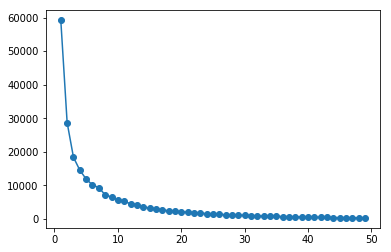

In [150]:
import matplotlib.pyplot as plt

plt.plot(range(1,50), inertia, marker='o')
plt.show()

We could divide the different body types in 3 groups: acceptable, on shape and unhealthy. So the number of clusters could be 3. 